In [2]:
print ('hello world')

hello world


In [3]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv("walmart_train.csv")

# 파일 경로
features_path = 'features.csv'


# 데이터 불러오기
features_df = pd.read_csv(features_path)

In [5]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False


In [6]:
# MarkDown1-5 제거
mask = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
df = df.drop(columns=mask)

# 날짜 데이터 처리
df["Date"] = pd.to_datetime(df["Date"])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].apply(lambda x: x.isocalendar()[1])
df['Y_M'] = df['Date'].dt.strftime('%Y-%m')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday_y   421570 non-null  bool          
 12  Year          421570 non-null  int32         
 13  Month         421570 non-null  int32         
 14  Week          421570 non-null  int64         
 15  Y_M           421

In [8]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,Year,Month,Week,Y_M
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,211.096358,8.106,False,2010,2,5,2010-02
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,211.096358,8.106,False,2010,2,5,2010-02
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,211.096358,8.106,False,2010,2,5,2010-02
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,211.096358,8.106,False,2010,2,5,2010-02
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,211.096358,8.106,False,2010,2,5,2010-02


In [9]:
df.describe()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375360,15981.258123,136727.915739,60.090059,3.361027,171.201947,7.960289,2010.968591,6.449510,25.826762
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,34875.000000,-2.060000,2.472000,126.064000,3.879000,2010.000000,1.000000,1.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,93638.000000,46.680000,2.933000,132.022667,6.891000,2010.000000,4.000000,14.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,140167.000000,62.090000,3.452000,182.318780,7.866000,2011.000000,6.000000,26.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,202505.000000,74.280000,3.738000,212.416993,8.572000,2012.000000,9.000000,38.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,219622.000000,100.140000,4.468000,227.232807,14.313000,2012.000000,12.000000,52.000000
std,12.785297,30.492054,NaN,22711.183519,60980.583328,18.447931,0.458515,39.159276,1.863296,0.796876,3.243217,14.151887


In [10]:
df['Type'].value_counts()

Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

In [11]:
# 그룹별 통계량 계산
grouped_stats = df.groupby('Type').agg({
    'Size': ['mean', 'std', 'min', 'max', 'sum'],
    'CPI': ['mean', 'std', 'min', 'max', 'sum'],
    'Unemployment': ['mean', 'std', 'min', 'max', 'sum'],
    'Fuel_Price': ['mean', 'std', 'min', 'max', 'sum']
})
# 통계량 출력
grouped_stats

Size                                                   CPI  \
               mean           std    min     max          sum        mean   
Type                                                                        
A     182231.285486  41534.529330  39690  219622  39266832934  174.408895   
B     101818.735827  30921.779415  34875  140167  16646854214  167.176656   
C      40535.725286   1194.434302  39690   42988   1726700290  170.429314   

                                                   Unemployment            \
            std      min         max           sum         mean       std   
Type                                                                        
A     39.496030  126.064  227.036936  3.758128e+07     7.791595  1.708474   
B     37.454468  126.064  227.232807  2.733255e+07     7.928836  1.859758   
C     42.261527  126.064  223.078337  7.259778e+06     8.934350  2.285474   

                                 Fuel_Price                          \
        min     max          sum       mean       std    min    max   
Type                                                                  
A     3.879  14.313  1678917.317   3.343999  0.458702  2.472  4.468   
B     4.125  14.313  1296325.079   3.382523  0.456880  2.514  4.468   
C     5.217  14.313   380576.509   3.364654  0.460287  2.514  4.468   

                  
             sum  
Type              
A     720558.149  
B     553025.656  
C     143324.148

In [12]:
# type 컬럼을 정수로 변환하여 새로운 컬럼 추가
df['Type_num'] = df['Type'].map({'A': 0, 'B': 1, 'C': 2})



In [13]:

# 숫자형 컬럼만 선택
numeric_columns = ['Type_num', 'Size', 'CPI', 'Unemployment', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'Markdown3', 'MarkDown4','MarkDown5', 'Temperature','Weekly_Sales', 'Dept']


/var/folders/g5/s4vlb8mj3q5033clv25l8n940000gn/T/ipykernel_3161/567277998.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y=column, data=df, palette=palette)
/var/folders/g5/s4vlb8mj3q5033clv25l8n940000gn/T/ipykernel_3161/567277998.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y=column, data=df, palette=palette)
/var/folders/g5/s4vlb8mj3q5033clv25l8n940000gn/T/ipykernel_3161/567277998.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y=column, data=df, palette=palette)
/var/folders/g5/s4vlb8mj3q50

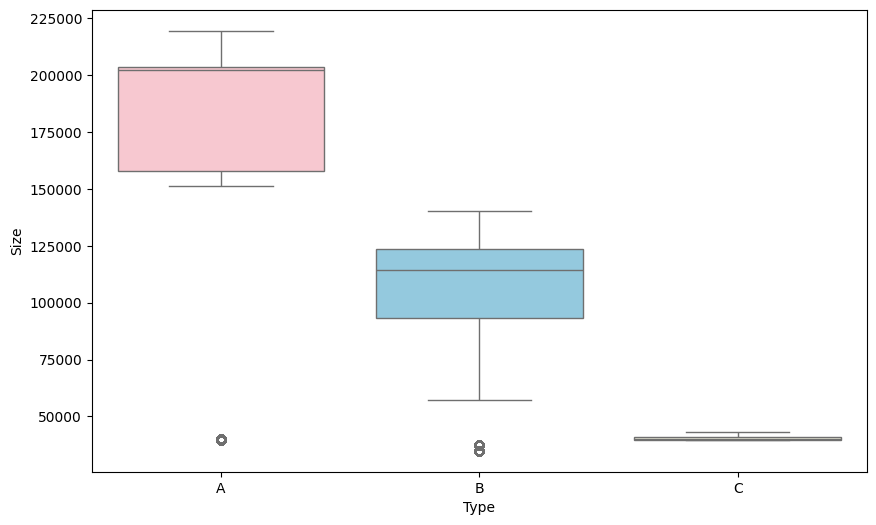

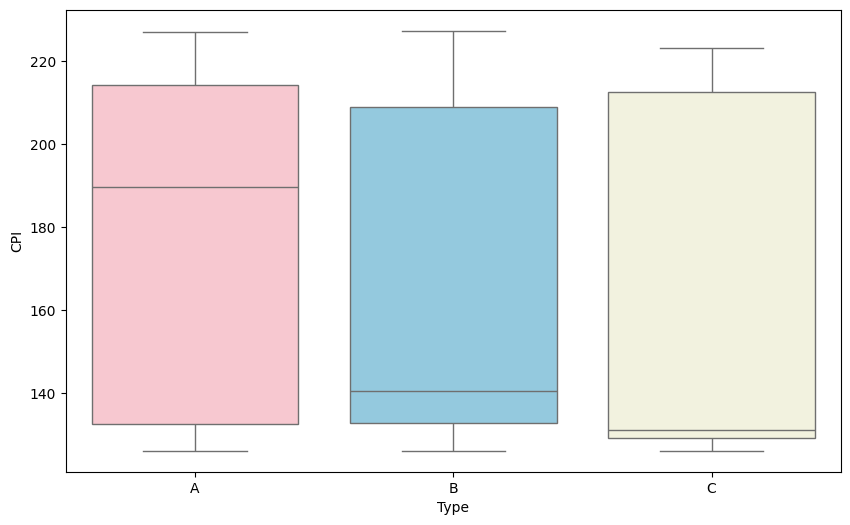

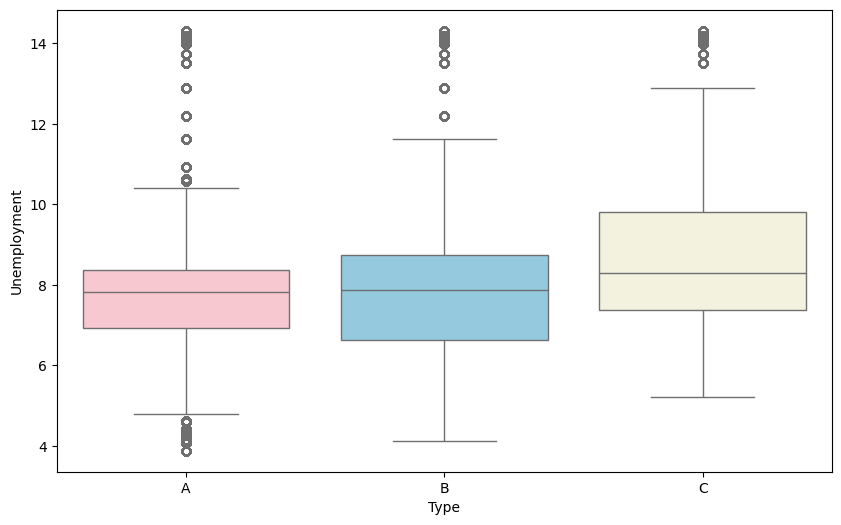

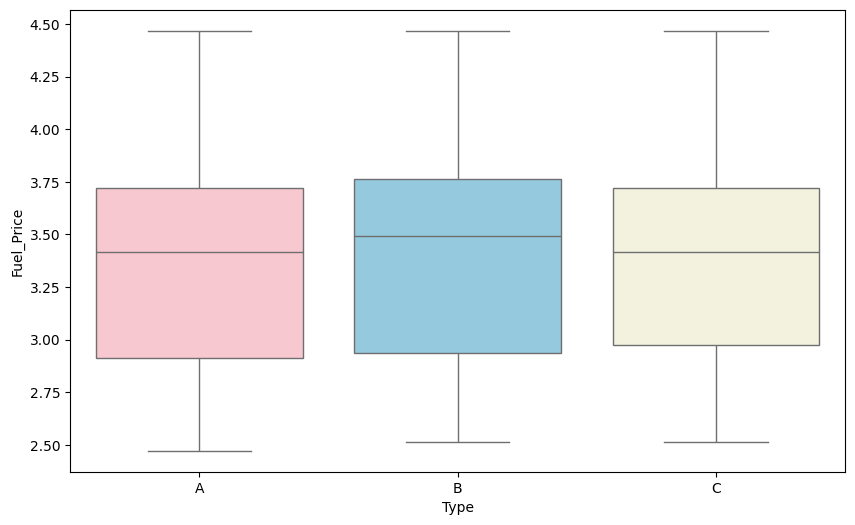

In [14]:
# 타입별 분포 시각화
import matplotlib.pyplot as plt
import seaborn as sns
# 숫자형 컬럼만 선택
numeric_columns = ['Size', 'CPI', 'Unemployment', 'Fuel_Price']
# 색상 팔레트 지정
palette = {'A': 'pink', 'B': 'skyblue', 'C': 'beige'}
# 타입별 분포 시각화 (박스플롯)
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Type', y=column, data=df, palette=palette)
    plt

/var/folders/g5/s4vlb8mj3q5033clv25l8n940000gn/T/ipykernel_3161/3430207416.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y=column, data=grouped_means,palette=palette)


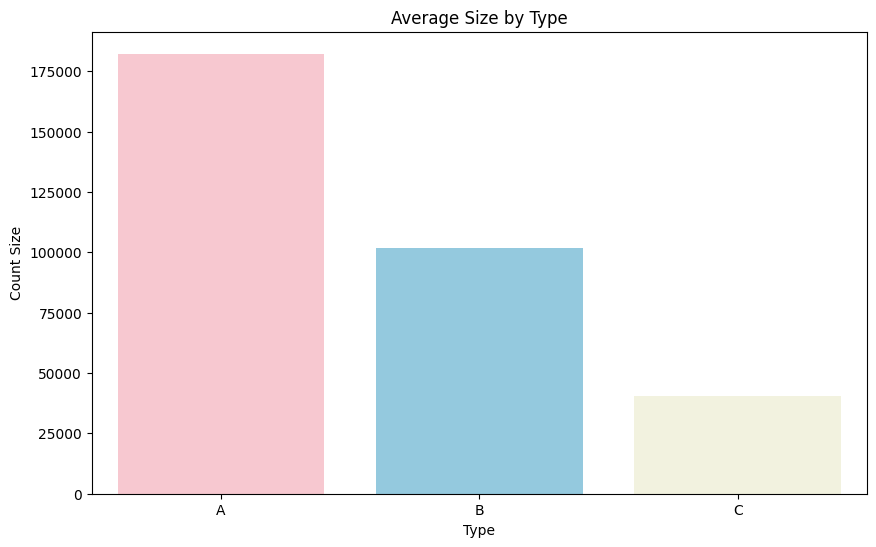

/var/folders/g5/s4vlb8mj3q5033clv25l8n940000gn/T/ipykernel_3161/3430207416.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y=column, data=grouped_means,palette=palette)


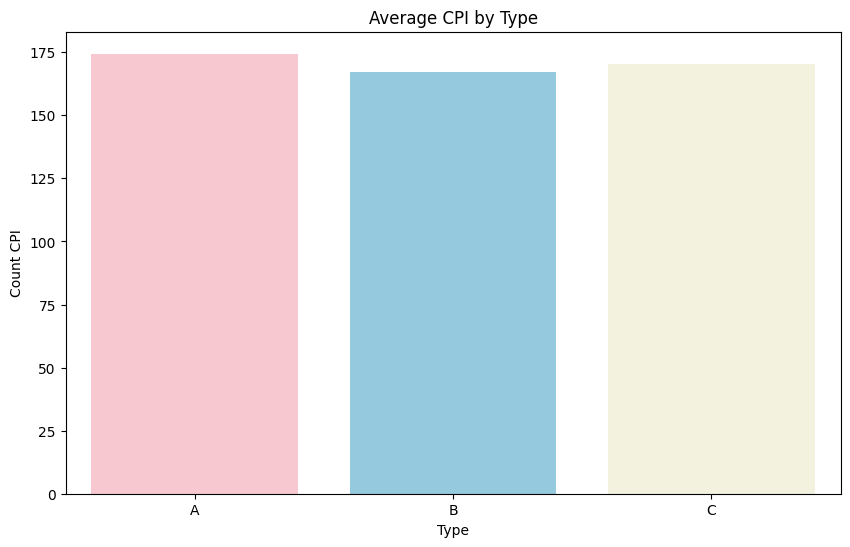

/var/folders/g5/s4vlb8mj3q5033clv25l8n940000gn/T/ipykernel_3161/3430207416.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y=column, data=grouped_means,palette=palette)


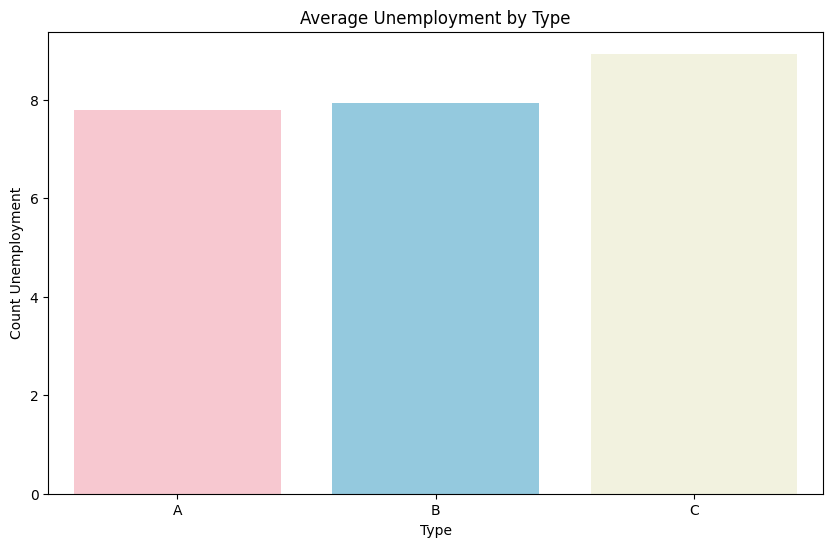

/var/folders/g5/s4vlb8mj3q5033clv25l8n940000gn/T/ipykernel_3161/3430207416.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y=column, data=grouped_means,palette=palette)


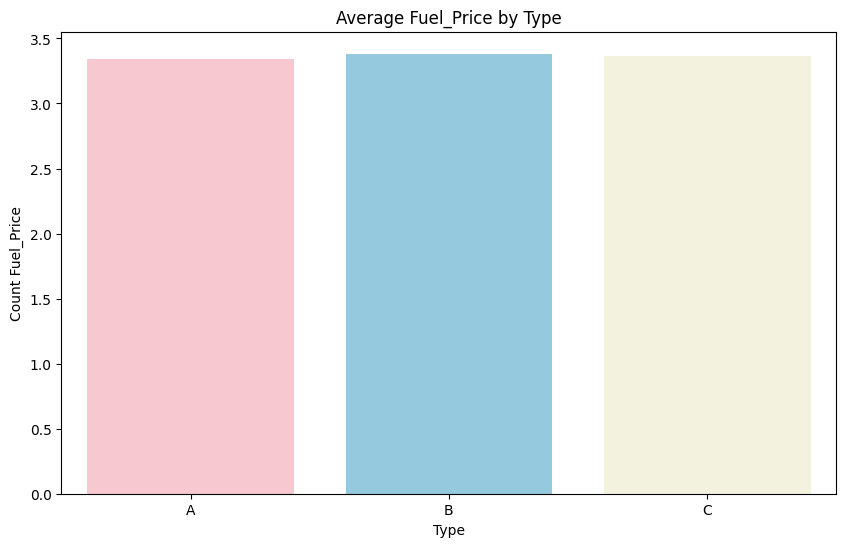

In [15]:
# 타입별 평균 값 계산
grouped_means = df.groupby('Type')[numeric_columns].mean().reset_index()

# 타입별 분포 시각화 (막대그래프)

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Type', y=column, data=grouped_means,palette=palette)
    plt.title(f'Average {column} by Type')
    plt.xlabel('Type')
    plt.ylabel(f'Count {column}')
    plt.show()

In [16]:
# 그룹별 A/B/C 타입의 분포와 개수 확인
store_type_counts = df.groupby(['Store', 'Type']).size().unstack(fill_value=0)
# 각 스토어별 총 개수
store_totals = store_type_counts.sum(axis=1)
# 스토어별 A/B/C의 비율 계산
store_type_ratios = store_type_counts.div(store_totals, axis=0)
# 결과 출력
store_type_ratios


Type,A,B,C
Store,,,
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0
6,1.0,0.0,0.0
7,0.0,1.0,0.0
8,1.0,0.0,0.0
9,0.0,1.0,0.0


In [17]:
# Dept별 통계량 계산
dept_stats = df.groupby(['Dept','Type'])['Weekly_Sales'].agg(['mean', 'max', 'min', 'median']).reset_index()
dept_stats

,Dept,Type,mean,max,min,median
0,1,A,22956.887886,172225.55,711.11,18698.615
1,1,B,17990.876158,140537.20,3440.69,13556.340
2,1,C,8951.733462,70912.01,3655.40,8659.295
3,2,A,51994.674873,131234.40,5453.18,51848.150
4,2,B,43051.996919,151090.50,9999.57,37054.800
...,...,...,...,...,...,...
222,98,B,319.205901,2997.84,-30.00,140.250
223,98,C,5479.758054,22329.99,1817.41,4910.745
224,99,A,431.443064,12550.00,-147.00,60.000
225,99,B,25.716667,59.76,2.29,29.880


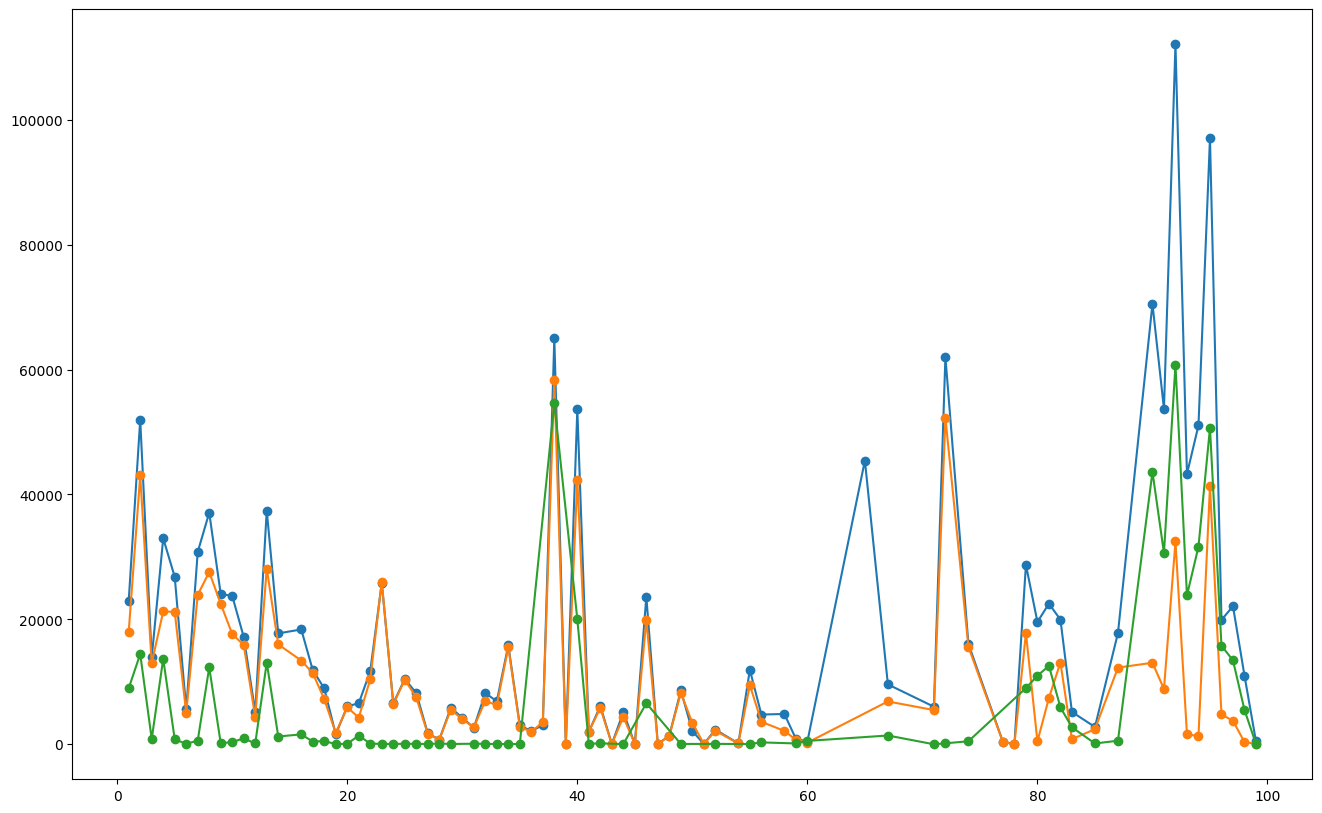

In [18]:
# 시각화
plt.figure(figsize=(16, 10))
# 타입별로 다른 플롯을 생성
for t in df['Type'].unique():
    subset = dept_stats[dept_stats['Type'] == t]
    plt.plot(subset['Dept'], subset['mean'], marker='o', label=f'{t} Mean')


In [19]:
type_stats = df.groupby('Type')['Weekly_Sales'].agg(['mean', 'max', 'min', 'median','sum']).reset_index()
type_stats

,Type,mean,max,min,median,sum
0,A,20099.568043,474330.10,-4988.94,10105.17,4.331015e+09
1,B,12237.075977,693099.36,-3924.00,6187.87,2.000701e+09
2,C,9519.532538,112152.35,-379.00,1149.67,4.055035e+08


Text(0, 0.5, 'Average Weekly Sales')

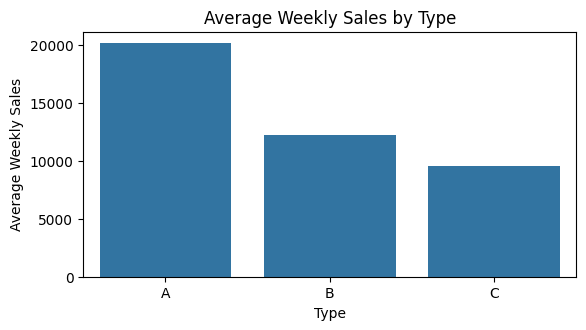

In [20]:
# 타입별 위클리 세일즈 통계량 시각화
plt.figure(figsize=(14, 7))
# 평균
plt.subplot(2, 2, 1)
sns.barplot(x='Type', y='mean', data=type_stats)
plt.title('Average Weekly Sales by Type')
plt.xlabel('Type')
plt.ylabel('Average Weekly Sales')

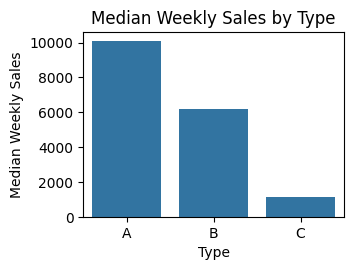

In [21]:
# 중앙값
plt.subplot(2, 2, 4)
sns.barplot(x='Type', y='median', data=type_stats)
plt.title('Median Weekly Sales by Type')
plt.xlabel('Type')
plt.ylabel('Median Weekly Sales')

plt.tight_layout()
plt.show()

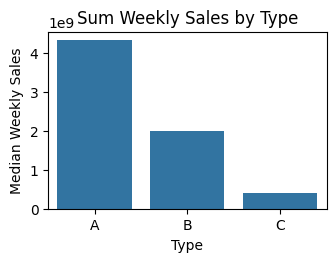

In [22]:
# 합계
plt.subplot(2, 2, 4)
sns.barplot(x='Type', y='sum', data=type_stats)
plt.title('Sum Weekly Sales by Type')
plt.xlabel('Type')
plt.ylabel('Median Weekly Sales')

plt.tight_layout()
plt.show()

In [23]:
# Pandas 옵션 설정 (출력 최대 행 수 설정)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# 타입별 부서번호 분포 계산
department_counts = df.groupby(['Type', 'Dept']).size().reset_index(name='counts')
# 상위 5개, 하위 5개 부서번호를 구하는 함수
def top_bottom_n(df, n=5):
    top_n = df.nlargest(n, 'counts')
    bottom_n = df.nsmallest(n, 'counts')
    return top_n, bottom_n
# 타입별 상위 5개, 하위 5개 부서번호 계산
results = {}
for t in df['Type'].unique():
    type_df = department_counts[department_counts['Type'] == t]
    top_n, bottom_n = top_bottom_n(type_df, n=5)
    results[t] = {
        'top_n': top_n,
        'bottom_n': bottom_n
    }
    # 결과 출력
for t, result in results.items():
    print(f"Type {t} - Top 5 Departments:\n{result['top_n']}\n")
    print(f"Type {t} - Bottom 5 Departments:\n{result['bottom_n']}\n")

Type A - Top 5 Departments:
  Type  Dept  counts
0    A     1    3146
1    A     2    3146
2    A     3    3146
3    A     4    3146
6    A     7    3146

Type A - Bottom 5 Departments:
   Type  Dept  counts
41    A    43       4
37    A    39      15
62    A    77      87
63    A    78     134
57    A    65     143

Type B - Top 5 Departments:
   Type  Dept  counts
81    B     1    2431
82    B     2    2431
83    B     3    2431
84    B     4    2431
85    B     5    2431

Type B - Bottom 5 Departments:
    Type  Dept  counts
118    B    39       1
122    B    43       8
160    B    99      12
142    B    77      63
143    B    78     101

Type C - Top 5 Departments:
    Type  Dept  counts
161    C     1     858
162    C     2     858
163    C     3     858
164    C     4     858
167    C     7     858

Type C - Bottom 5 Departments:
    Type  Dept  counts
178    C    19       1
193    C    35       1
188    C    29      16
207    C    71      16
226    C    99      21



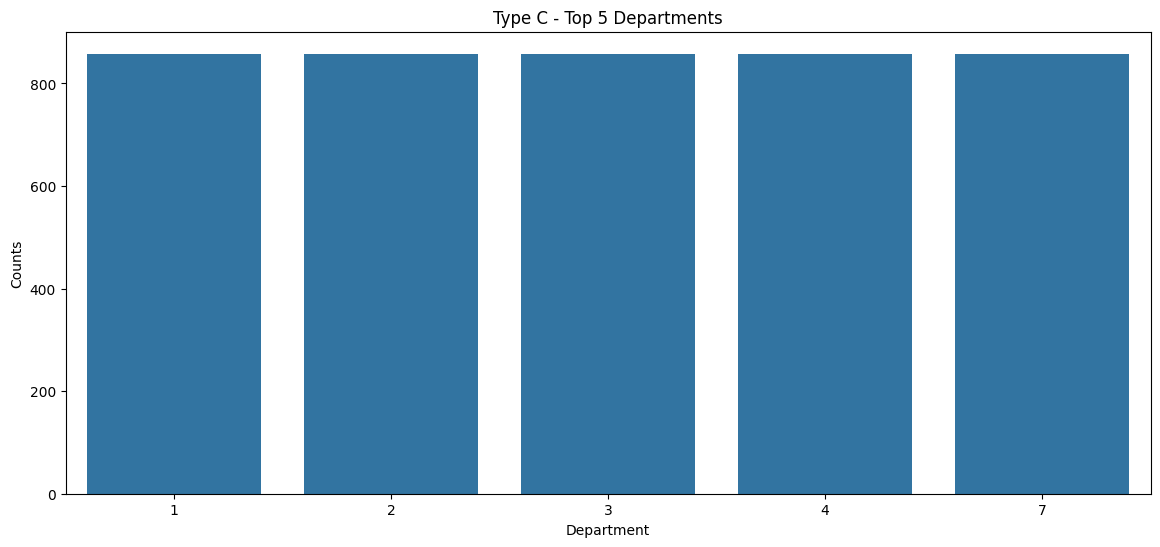

In [24]:
    # 상위 5개 시각화
    plt.figure(figsize=(14, 6))
    sns.barplot(data=result['top_n'], x='Dept', y='counts')
    plt.title(f'Type {t} - Top 5 Departments')
    plt.xlabel('Department')
    plt.ylabel('Counts')
    plt.show()

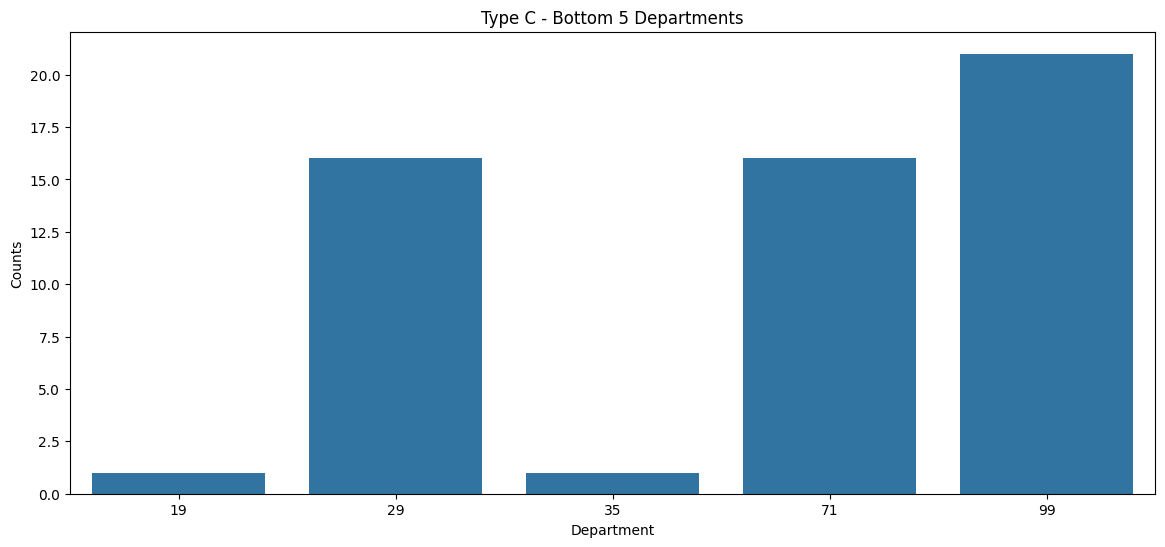

In [25]:
    # 하위 5개 시각화
    plt.figure(figsize=(14, 6))
    sns.barplot(data=result['bottom_n'], x='Dept', y='counts')
    plt.title(f'Type {t} - Bottom 5 Departments')
    plt.xlabel('Department')
    plt.ylabel('Counts')
    plt.show()

In [26]:
# 관심있는 부서 번호
store = [3, 5, 33, 36]
# 해당 부서들의 weekly_sales 데이터 필터링
store_sales = df[df['Store'].isin(store)]
# 통계량 계산
store_stats = store_sales.groupby(['Store','Type'])['Weekly_Sales'].agg(['mean', 'max', 'min', 'median', 'sum']).reset_index()
store_stats


,Store,Type,mean,max,min,median,sum
0,3,B,6373.033983,155897.94,-1008.96,2804.815,57586735.07
1,5,B,5053.415813,93517.72,-101.26,2582.660,45475688.90
2,33,A,5728.414053,49129.77,-39.76,912.810,37160221.96
3,36,A,8584.412563,78974.83,-419.28,1903.285,53412214.97


In [27]:
from sklearn.preprocessing import StandardScaler
# z-score 를 적용할 컬럼 선정
df1 = df[['Temperature','CPI','Fuel_Price','Unemployment']]
# Size 컬럼을 표준화(스케일링)
scale_df = StandardScaler().fit_transform(df1)
# 스케일링된 데이터프레임을 기존 데이터프레임과 합치기
scaled_df = pd.DataFrame(scale_df, columns=['Temperature_zscore', 'CPI_zscore', 'Fuel_Price_zscore', 'Unemployment_zscore'])
merge_df = pd.concat([df1.reset_index(drop=True), scaled_df.reset_index(drop=True)], axis=1)
# 상한과 하한 설정
upper_bound = 3
lower_bound = -3
# 이상치 감지: Z-Score가 -3보다 작거나 3보다 큰 경우
mask = (scaled_df < lower_bound) | (scaled_df > upper_bound)
# 이상치가 포함된 행들을 필터링
outlier_rows = merge_df[mask.any(axis=1)]
# 상한과 하한을 새로운 컬럼으로 추가
merge_df['upper_bound'] = upper_bound
merge_df['lower_bound'] = lower_bound
# 결과 확인
merge_df.head(), outlier_rows

(   Temperature         CPI  Fuel_Price  Unemployment  Temperature_zscore  \
 0        42.31  211.096358       2.572         8.106           -0.963798   
 1        42.31  211.096358       2.572         8.106           -0.963798   
 2        42.31  211.096358       2.572         8.106           -0.963798   
 3        42.31  211.096358       2.572         8.106           -0.963798   
 4        42.31  211.096358       2.572         8.106           -0.963798   
 
    CPI_zscore  Fuel_Price_zscore  Unemployment_zscore  upper_bound  \
 0    1.018774          -1.720834             0.078201            3   
 1    1.018774          -1.720834             0.078201            3   
 2    1.018774          -1.720834             0.078201            3   
 3    1.018774          -1.720834             0.078201            3   
 4    1.018774          -1.720834             0.078201            3   
 
    lower_bound  
 0           -3  
 1           -3  
 2           -3  
 3           -3  
 4           -3  ,

In [28]:
# 이상치 감지 
# Z-SCORE 기반, -3 보다 작거나 3보다 큰 경우를 이상치로 판별 
mask = (scale_df < -3) | (scale_df > 3)
# mask 메소드 사용
strange_df = merge_df[mask]
# 총 ? 건 탐지 
strange_df.count()

Temperature            13825
CPI                    13825
Fuel_Price             13825
Unemployment           13825
Temperature_zscore     13825
CPI_zscore             13825
Fuel_Price_zscore      13825
Unemployment_zscore    13825
upper_bound            13825
lower_bound            13825
dtype: int64

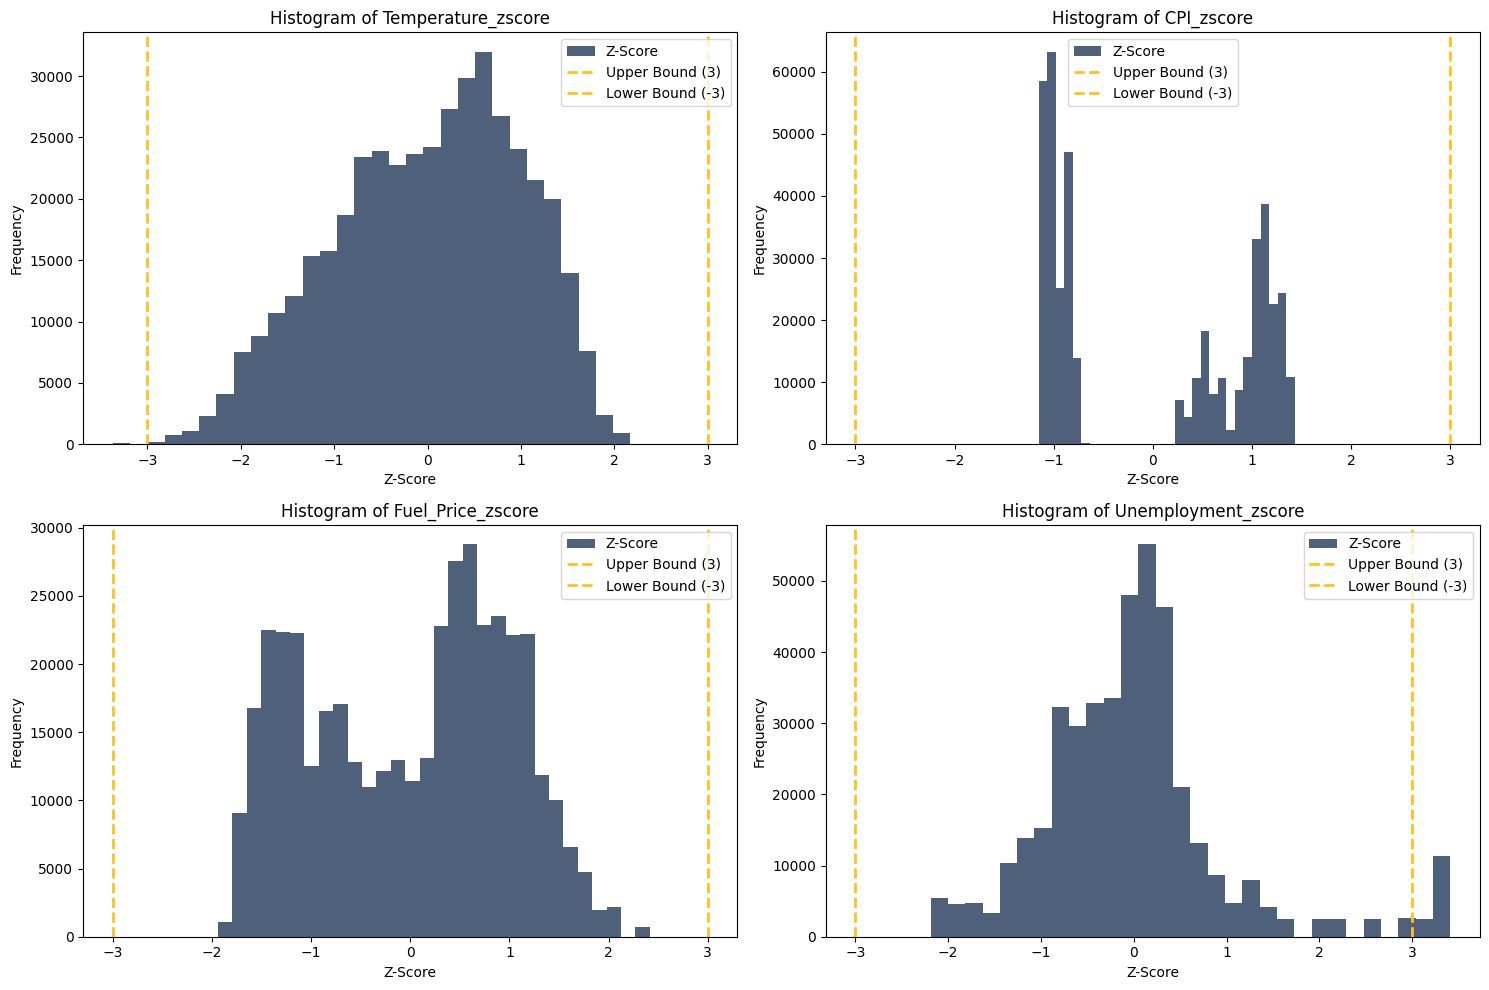

In [29]:
# 히스토그램 그리기
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(scaled_df.columns):
    ax = axs[i // 2, i % 2]
    ax.hist(scaled_df[col], bins=30, color='#041E42', alpha=0.7, label='Z-Score')
    ax.axvline(upper_bound, color='#FFC220', linestyle='dashed', linewidth=2, label='Upper Bound (3)')
    ax.axvline(lower_bound, color='#FFC220', linestyle='dashed', linewidth=2, label='Lower Bound (-3)')
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel('Z-Score')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()